Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.2466 - acc: 0.9232 - val_loss: 0.1137 - val_acc: 0.9644
Epoch 2/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.1011 - acc: 0.9689 - val_loss: 0.0932 - val_acc: 0.9706
Epoch 3/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0778 - acc: 0.9767 - val_loss: 0.0989 - val_acc: 0.9708
Epoch 4/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0613 - acc: 0.9813 - val_loss: 0.0718 - val_acc: 0.9800
Epoch 5/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0524 - acc: 0.9842 - val_loss: 0.0762 - val_acc: 0.9810
Epoch 6/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0463 - acc: 0.9867 - val_loss: 0.0947 - val_acc: 0.9804
Epoch 7/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0402 - acc: 0.9880 - val_loss: 0.0850 - val_acc

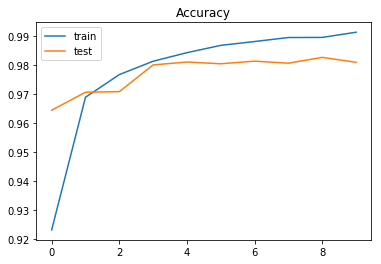

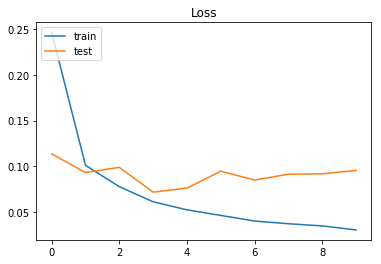

In [14]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

# MNISTのデータ読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 28x28=784　１次元にして0-1に変換 最大値255で割る
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255

# ラベルデータをOne-hotベクトルに直す
# keras.utils.np_utils.to_categorical(ベクトルに変換したい配列,総クラス数) 10だと0-9に分ける(数字の判別)
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

#入力と出力指定
in_size = 28 *28
out_size = 10

# MLP（多層パーセプトロン）モデル構造を定義
Dense = keras.layers.Dense
Dropout = keras.layers.Dropout
RMSprop = keras.optimizers.RMSprop

model = keras.models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
# Dropout：過学習を防ぐため入力のいくらかにランダムに０セットする
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))
                
# モデル構築
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行
# history はfitの戻り値（辞書の値が配列）
# acc（訓練データの精度）,val_acc（バリデーションデータの精度）,loss（訓練データの損失）,val_loss（バリデーションデータの損失)
hist = model.fit(X_train, y_train, batch_size=128, epochs =10,verbose = 1, validation_data = (X_test,y_test))
# モデル評価
score = model.evaluate(X_test, y_test, verbose = 1)
print('正解率：', score[1], 'loss：',score[0])

# 学習の様子をグラフに描画
# 正解率
# accの記録
plt.plot(hist.history['acc'])
#validationのデータ
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
# legend((line1, line2, line3), ('label1', 'label2', 'label3'),loc='凡例の位置')
plt.legend(['train','test'], loc='upper left')
plt.show()
# ロス
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()